# Import data from https://www.worldometers.info/ 

In [106]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import requests

In [107]:
header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36","X-Requested-With": "XMLHttpRequest"}

## Import world populaion data 

In [108]:
url="https://www.worldometers.info/world-population/population-by-country/"

In [109]:
page = requests.get(url, headers=header)
wp=pd.read_html(page.text)[0]

In [110]:
wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


## Import detailed data for each country 

In [111]:
url="https://www.worldometers.info/world-population/population-by-country/"
page = requests.get(url, headers=header)
soup=bs(page.content,'html.parser')

links=soup.select("div[class='col-md-12'] div[class='table-responsive'] tbody tr td:nth-child(2) a")[:11]

pop_data=pd.DataFrame()
for link in links:
    country=link.text
    href=link["href"]
    url2="https://www.worldometers.info/"+link["href"]
    page = requests.get(url2, headers=header)
    pop=pd.concat([pd.read_html(page.text)[2],pd.read_html(page.text)[1]],ignore_index=True).sort_values("Year",ascending=False)
    pop=pop.iloc[:,:-1]
    pop["Country"]=country
    pop_data=pd.concat([pop_data,pop],ignore_index=True)

In [112]:
pop_data.head(5)

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Country
0,2050.0,1.402405e+09,-0.38 %,-5381416.0,NaN,47.6,1.69,149.0,77.9 %,1.091948e+09,14.41 %,9.735034e+09,China
1,2045.0,1.429312e+09,-0.27 %,-3943835.0,-311081.0,47.2,1.69,152.0,76.4 %,1.092037e+09,15.07 %,9.481803e+09,China
2,2040.0,1.449031e+09,-0.17 %,-2410321.0,-311801.0,46.3,1.69,154.0,74.8 %,1.083464e+09,15.75 %,9.198847e+09,China
3,2035.0,1.461083e+09,-0.04 %,-651426.0,-311798.0,45.0,1.69,156.0,72.5 %,1.059619e+09,16.44 %,8.887524e+09,China
4,2030.0,1.464340e+09,0.09 %,1286382.0,-352100.0,42.6,1.69,156.0,69.5 %,1.017847e+09,17.13 %,8.548487e+09,China


## Import life expectancy data

In [113]:
url="https://www.worldometers.info/demographics/life-expectancy/"
page = requests.get(url, headers=header)
le=pd.read_html(page.text)[0]

In [114]:
le.head(5)

,#,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.29,88.17,82.38
1,2,Japan,85.03,88.09,81.91
2,3,Macao,84.68,87.62,81.73
3,4,Switzerland,84.25,86.02,82.42
4,5,Singapore,84.07,86.15,82.06


## Import GDP data 

In [115]:
url="https://www.worldometers.info/gdp/gdp-by-country/"
page=requests.get(url, headers=header)
gdp=pd.read_html(page.text)[0]

In [116]:
gdp.head()

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756,"$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,127502725,"$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,82658409,"$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,1338676785,"$1,980",3.28%


## Import detailed DGP data 

In [117]:
url="https://www.worldometers.info/gdp/gdp-by-country/"
page = requests.get(url, headers=header)
soup=bs(page.content,'html.parser')

links=soup.select("div[class='container'] div[class='col-md-12'] tbody tr td:nth-child(2) a")[:11]

gdp_data=pd.DataFrame()
for link in links:
    country=link.text
    href=link["href"]
    url2="https://www.worldometers.info/"+link["href"]
    page = requests.get(url2, headers=header)
    df=pd.read_html(page.text)[1]
    df["country"]=country
    gdp_data=pd.concat([gdp_data,df],ignore_index=True)     

In [118]:
gdp_data.head()

,Year,GDP Nominal (Current USD),GDP Real (Inflation adj.),GDP change,GDP per capita,Pop. change,Population,country
0,2017,"$19,485,394,000,000","$17,348,625,758,200",2.27%,"$53,366",0.64 %,325084756,United States
1,2016,"$18,707,189,000,000","$16,972,347,070,400",1.49%,"$52,543",0.67 %,323015995,United States
2,2015,"$18,219,297,000,000","$16,710,458,234,000",2.86%,"$52,077",0.69 %,320878310,United States
3,2014,"$17,521,747,000,000","$16,242,525,613,600",2.57%,"$50,969",0.72 %,318673411,United States
4,2013,"$16,784,851,000,000","$15,853,794,839,100",1.68%,"$50,107",0.75 %,316400538,United States


# Success! All necessary data has been scraped from worldometers.com!

## here are the dataframes: 

#### wp - world population without details
#### pop_data - world population by country and year
#### le - life expectancy
#### gdp - world GDP without details
#### gdp_data - world GDP by country and year

In [119]:
wp=wp.rename(columns={"Urban Pop %":"Urban Pop"})
wp=wp.replace(["N.A.",np.NaN],regex=True)
wp["Yearly Change"]=wp["Yearly Change"].str.replace("%","",regex=True).astype(float)
wp["Urban Pop"]=wp["Urban Pop"].str.replace("%","",regex=True)
wp["World Share"]=wp["World Share"].str.replace("%","",regex=True).astype(float)

In [120]:
fig=px.bar(wp.sort_values("Land Area (Km²)",ascending=False)[:50],x="Country (or dependency)",y="Land Area (Km²)",barmode="group",
       color="Density (P/Km²)",
       title="Top 50 largest countries by land area",
           color_continuous_scale="hot"
      )
fig.show()

In [121]:
Density=[]
for i in wp["Density (P/Km²)"]:
    if i<100:
        Density.append("low")
    elif i>=100 and i<200:
        Density.append("average")
    else:
        Density.append("High")
wp["Density"]=Density

In [122]:
wp["Med. Age"]=wp["Med. Age"].astype(float)

fig=px.histogram(
    wp,"Med. Age",
    title="Median Age Distribution",
    nbins=20,
    #histnorm='probability density',
    color_discrete_sequence=['indianred'],
    opacity=0.8,
    #color="Density"
    #log_y=True
                )
fig.update_traces(marker_line_width=1,marker_line_color="black")
fig.show()

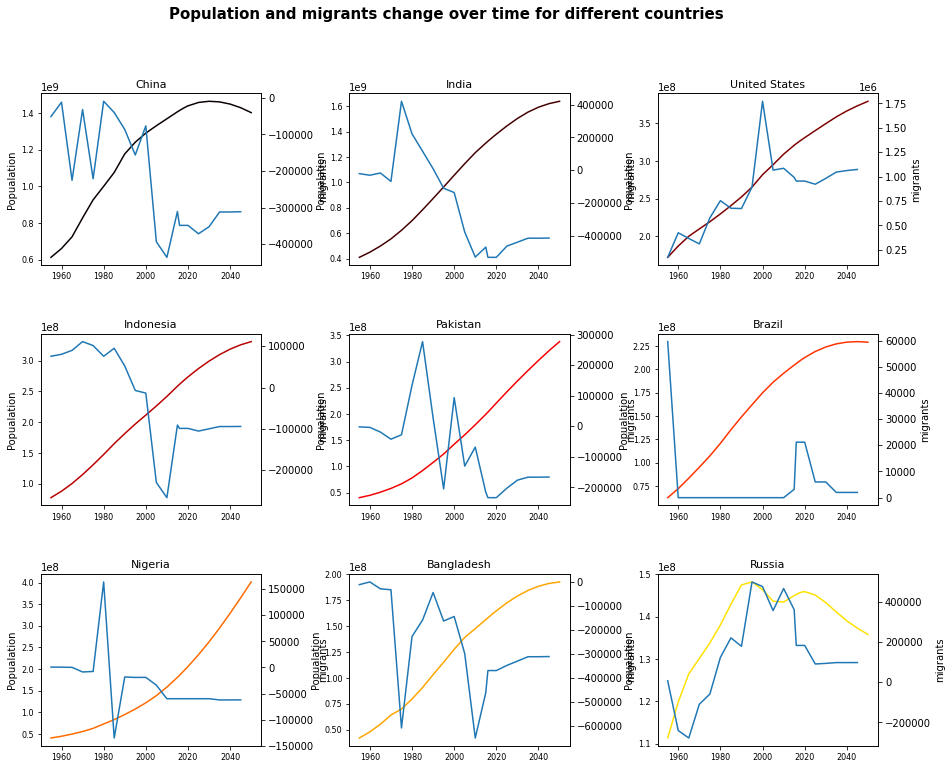

In [123]:
countries=pop_data.Country.unique()[:9]
fig,axes=plt.subplots(3,3,figsize=(15,12))
colors=list(plt.get_cmap("hot")(np.linspace(0,0.7,len(countries))))

for country,ax,c in zip(countries,axes.ravel(),colors):
    filtered=pop_data[pop_data.Country==country].sort_values("Year")
    filtered.plot(ax=ax,kind="line",x="Year",y="Population",
                    xlabel="",legend=False,fontsize=8,color=c)
    ax.set_title(country,size=11)
    ax.set_ylabel("Popualation")
    
    
    ax2=ax.twinx()
    ax2.plot(filtered["Year"],filtered["Migrants (net)"])
    ax2.set_ylabel("migrants")
    
plt.subplots_adjust(hspace=0.4,wspace=0.4)
    
fig.suptitle('Population and migrants change over time for different countries', size=15,fontweight="bold")
plt.show()


In [124]:
fig=px.bar(le.sort_values("Life Expectancy (both sexes)",ascending=False)[:10],
           x="Country",y=["Females Life Expectancy","Males Life Expectancy"],
          barmode="group",
          title=("Countries with the highest Life expectancy"),
          color_continuous_scale="hot",
          )
fig.update_layout(yaxis_title="life expectancy")
fig.show()

In [125]:
fig=px.histogram(le,x=["Females Life Expectancy","Males Life Expectancy"],nbins=20)
#fig.update_traces(marker_line_width=1,marker_line_color="black")
fig.update_layout(title="life expectancy for both genders",xaxis_title="life expectancy")

fig.show()

## Merge GDP and LE data (on="Country") 

In [127]:
gdple=gdp.merge(le,on="Country")

### convert GDP columns to float

In [128]:
gdp_in_float=[]
for i in gdple["GDP (abbrev.)"]:
    if i.split("$")[1].split(" ")[1]=="trillion":
        gdp_in_float.append(float(i.split("$")[1].split(" ")[0])*10**12)
    elif i.split("$")[1].split(" ")[1]=="billion":
        gdp_in_float.append(float(i.split("$")[1].split(" ")[0])*10**9)
    elif i.split("$")[1].split(" ")[1]=="million":
        gdp_in_float.append(float(i.split("$")[1].split(" ")[0])*10**6)
    else:
        gdp_in_float.append(None)
gdple["gdp_in_float"]=gdp_in_float        


gdple['GDP per capita']=gdple["GDP per capita"].apply(lambda x :float(x.split("$")[1].replace(",","")))



In [129]:
fig=px.scatter(gdple,x="Life Expectancy (both sexes)",y="GDP per capita",size="gdp_in_float",color="gdp_in_float",hover_name="Country")
fig.update_layout(title="GDP per capita vs Life expectancy",xaxis_title="Life Expectancy")
fig.show()
print("Correlation coefficient between GDP per capita and Life expectancy is ", round(gdple["GDP per capita"].corr(gdple["Life Expectancy (both sexes)"]),2))

Correlation coefficient between GDP per capita and Life expectancy is  0.66


## Plot interactive scatter plot of life expectancy vs GDP per capita changing year by year 

In [130]:
gdpdatale=gdp_data.merge(le,left_on="country",right_on="Country")

gdpdatale["GDP per capita"]=gdpdatale["GDP per capita"].apply(lambda x :float(x.split("$")[1].replace(",","")))
gdpdatale["GDP Real (Inflation adj.)"]=gdpdatale["GDP Real (Inflation adj.)"].apply(lambda x :float(x.split("$")[1].replace(",","")))

In [131]:
fig=px.scatter(gdpdatale.sort_values(["Country","Year"]),x="Life Expectancy (both sexes)",y="GDP per capita",
               size="GDP Real (Inflation adj.)",color="GDP Real (Inflation adj.)",
               hover_name="Country",
               animation_frame="Year",
              range_y=(0,gdpdatale["GDP per capita"].max()+5*10**3))
fig.update_layout(title="GDP per capita vs Life expectancy by Year",xaxis_title="Life Expectancy")
fig.show()